In [ ]:
!pip install tensorflow matplotlib



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import zipfile

with zipfile.ZipFile("/tmp/cats_and_dogs_filtered.zip", "r") as zip_ref:
    zip_ref.extractall("/tmp")


--2024-05-26 17:43:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.162.207, 74.125.134.207, 74.125.139.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.162.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  93.6MB/s    in 0.7s    

2024-05-26 17:43:07 (93.6 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/tmp/cats_and_dogs_filtered/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 2000 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator, epochs=10, verbose=1)

# Save the model for later use
model.save("cat_dog_classifier.h5")

Epoch 1/10
63/63 [==============================] - 118s 2s/step - loss: 0.7110 - accuracy: 0.5045
Epoch 2/10
63/63 [==============================] - 115s 2s/step - loss: 0.6845 - accuracy: 0.5530
Epoch 3/10
63/63 [==============================] - 116s 2s/step - loss: 0.6581 - accuracy: 0.6110


In [ ]:
history = model.fit(train_generator, epochs=15, verbose=1)

# Save the model for later use
model.save("cat_dog_classifier.h5")

Epoch 1/15
63/63 [==============================] - 93s 1s/step - loss: 0.4734 - accuracy: 0.7730
Epoch 2/15
63/63 [==============================] - 94s 1s/step - loss: 0.4492 - accuracy: 0.7890
Epoch 3/15
63/63 [==============================] - 96s 2s/step - loss: 0.4302 - accuracy: 0.7995
Epoch 4/15
63/63 [==============================] - 95s 2s/step - loss: 0.4215 - accuracy: 0.8135
Epoch 5/15
63/63 [==============================] - 96s 2s/step - loss: 0.4136 - accuracy: 0.8115
Epoch 6/15
63/63 [==============================] - 95s 1s/step - loss: 0.3783 - accuracy: 0.8295
Epoch 7/15
63/63 [==============================] - 94s 1s/step - loss: 0.3738 - accuracy: 0.8320
Epoch 8/15
63/63 [==============================] - 94s 1s/step - loss: 0.3620 - accuracy: 0.8375
Epoch 9/15
63/63 [==============================] - 95s 2s/step - loss: 0.3293 - accuracy: 0.8590
Epoch 10/15
63/63 [==============================] - 96s 2s/step - loss: 0.3118 - accuracy: 0.8710
Epoch 11/15
63/63 [

In [ ]:
img_path = "/content/pepper-new.png"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

In [ ]:
predictions = model.predict(img_array)
class_names = ['Cat', 'Dog']
predicted_class = class_names[int(predictions[0, 0])]

1/1 [==============================] - 0s 34ms/step


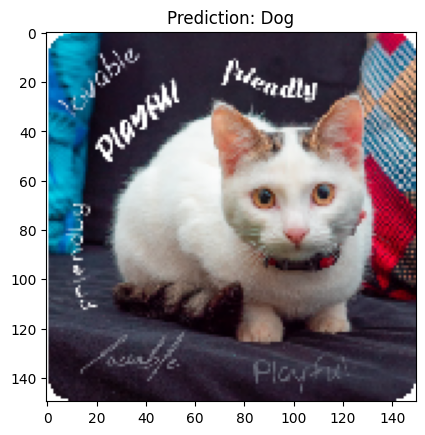

In [ ]:
plt.imshow(img)
plt.title(f"Prediction: {predicted_class}")
plt.show()